In [ ]:
! pip install pymorphy2

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd
import math

from collections import Counter

import pymorphy2
import re

import torch
from torch.autograd import Variable
import torch.functional as F
import torch.nn.functional as F

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Предобработка текста и эмбединги (Text preprocessing & Embeddings)**

**Проблема:** Компьютер не может воспринимать текст, также как человек, так как воспринимает только числовые данные.

**Решение:** Текст нужно обработать (text preprocessing) и привести в векторный вид (embedding).

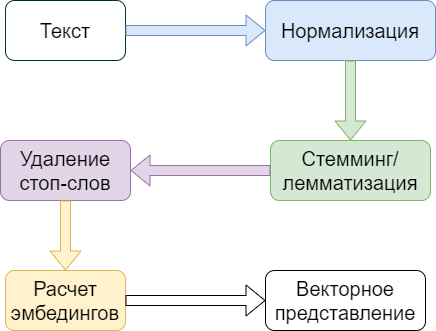



---


**Нормализация​:**

  - приведение к нижнему регистру.​

  - удаление символов не принадлежащих языку.​

  - удаление ссылок, тэгов и прочей тех. информации.



```
lower_text = TEXT.lower()

clean_text = re.sub('[^а-я ]', '', lower_text)
```





---


**Токенизация​:**

  Разбиение текста на смысловые единицы (в самом простом случае отдельные слова) по символам-разделителям, пунктуации, грамматическим правилам.



```
clean_tokens = nltk.word_tokenize(TEXT)
```





---


**Стемминг​:**

  Стандартизация слов, как правило отбрасыванием окончаний.

```
stemmed_word = nltk.stem.PorterStemmer().stem(WORD)
```

обучение -> обучен​

обучил -> обуч



---


**Лемматизация​:**

  Приведение слов к начальной форме путем определения части речи.
```
morph_analyzer = pymorphy2.MorphAnalyzer().parse(WORD)
```
обучение -> обучение​

обучил -> обучить




---


**Удаление стоп-слов​:**

  Фильтрация текста от бесполезных токенов.


---


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между']



---


**Может быть полезно:​**

Исправление грамматических ошибок.


```
autocorrect.spell(WORD)
```

Ниже - пример препроцессинга фрагмента статьи с Habr.

In [ ]:
row_text = """
Обычно при оптимизации гиперпараметров алгоритма (например, в случае перебора по сетке GridSearchCV ) используется одна метрика,
улучшение которой мы и ожидаем увидеть на тестовой выборке.
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества.
F-мера (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :


$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$


$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$)
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.
В sklearn есть удобная функция _metrics.classificationreport, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.
"""

In [ ]:
lowercase_text = row_text.lower()

clean_text = re.sub('[^а-я ]', '', lowercase_text)

print(clean_text)

обычно при оптимизации гиперпараметров алгоритма например в случае перебора по сетке   используется одна метрикаулучшение которой мы и ожидаем увидеть на тестовой выборкесуществует несколько различных способов объединить  и  в агрегированный критерий качествамера в общем случае    среднее гармоническое  и                 в данном случае определяет вес точности в метрике и при    это среднее гармоническое с множителем  чтобы в случае    и    иметь    мера достигает максимума при полноте и точности равными единице и близка к нулю если один из аргументов близок к нулюв  есть удобная функция  возвращающая   и меру для каждого из классов а также количество экземпляров каждого класса


In [ ]:
clean_tokens = nltk.word_tokenize(clean_text)

print(clean_tokens)

['обычно', 'при', 'оптимизации', 'гиперпараметров', 'алгоритма', 'например', 'в', 'случае', 'перебора', 'по', 'сетке', 'используется', 'одна', 'метрикаулучшение', 'которой', 'мы', 'и', 'ожидаем', 'увидеть', 'на', 'тестовой', 'выборкесуществует', 'несколько', 'различных', 'способов', 'объединить', 'и', 'в', 'агрегированный', 'критерий', 'качествамера', 'в', 'общем', 'случае', 'среднее', 'гармоническое', 'и', 'в', 'данном', 'случае', 'определяет', 'вес', 'точности', 'в', 'метрике', 'и', 'при', 'это', 'среднее', 'гармоническое', 'с', 'множителем', 'чтобы', 'в', 'случае', 'и', 'иметь', 'мера', 'достигает', 'максимума', 'при', 'полноте', 'и', 'точности', 'равными', 'единице', 'и', 'близка', 'к', 'нулю', 'если', 'один', 'из', 'аргументов', 'близок', 'к', 'нулюв', 'есть', 'удобная', 'функция', 'возвращающая', 'и', 'меру', 'для', 'каждого', 'из', 'классов', 'а', 'также', 'количество', 'экземпляров', 'каждого', 'класса']


In [ ]:
morph_analyzer = pymorphy2.MorphAnalyzer(lang='ru')
lemmatized_tokens = [
    morph_analyzer.parse(token) for token in clean_tokens
]
lemmatized_tokens = [
    analysis_results[0].normal_form
    for analysis_results in lemmatized_tokens
    if analysis_results 
]

print(lemmatized_tokens)

['обычно', 'при', 'оптимизация', 'гиперпараметр', 'алгоритм', 'например', 'в', 'случай', 'перебор', 'по', 'сетка', 'использоваться', 'один', 'метрикаулучшение', 'который', 'мы', 'и', 'ожидать', 'увидеть', 'на', 'тестовый', 'выборкесуществовать', 'несколько', 'различный', 'способ', 'объединить', 'и', 'в', 'агрегированный', 'критерий', 'качествамера', 'в', 'общий', 'случай', 'средний', 'гармонический', 'и', 'в', 'данный', 'случай', 'определять', 'вес', 'точность', 'в', 'метрика', 'и', 'при', 'это', 'средний', 'гармонический', 'с', 'множитель', 'чтобы', 'в', 'случай', 'и', 'иметь', 'мера', 'достигать', 'максимум', 'при', 'полнота', 'и', 'точность', 'равный', 'единица', 'и', 'близкий', 'к', 'нуль', 'если', 'один', 'из', 'аргумент', 'близкий', 'к', 'нулюв', 'есть', 'удобный', 'функция', 'возвращать', 'и', 'мера', 'для', 'каждый', 'из', 'класс', 'а', 'также', 'количество', 'экземпляр', 'каждый', 'класс']


In [ ]:
stopwords = nltk.corpus.stopwords.words('russian')
preprocessed_words = [
    token for token in lemmatized_tokens if token not in stopwords
]

print(preprocessed_words)

['обычно', 'оптимизация', 'гиперпараметр', 'алгоритм', 'например', 'случай', 'перебор', 'сетка', 'использоваться', 'метрикаулучшение', 'который', 'ожидать', 'увидеть', 'тестовый', 'выборкесуществовать', 'несколько', 'различный', 'способ', 'объединить', 'агрегированный', 'критерий', 'качествамера', 'общий', 'случай', 'средний', 'гармонический', 'данный', 'случай', 'определять', 'вес', 'точность', 'метрика', 'это', 'средний', 'гармонический', 'множитель', 'случай', 'иметь', 'мера', 'достигать', 'максимум', 'полнота', 'точность', 'равный', 'единица', 'близкий', 'нуль', 'аргумент', 'близкий', 'нулюв', 'удобный', 'функция', 'возвращать', 'мера', 'каждый', 'класс', 'также', 'количество', 'экземпляр', 'каждый', 'класс']


**Пример предобработки датасета**

In [ ]:
data = pd.read_csv("row_data.csv")

data_len = len(data)
wordnet_lemmatizer = WordNetLemmatizer()

for i in range(data_len):
    print(i, data_len)
    text = data.loc[i,"text"].lower()

    clean_text = re.sub('[^а-я ]', '', text)

    clean_tokens = nltk.word_tokenize(clean_text)

    morph_analyzer = pymorphy2.MorphAnalyzer(lang='ru')
    lemmatized_tokens = [ morph_analyzer.parse(token) for token in clean_tokens ]
    lemmatized_tokens = [
            analysis_results[0].normal_form
            for analysis_results in lemmatized_tokens
            if analysis_results
        ]

    stopwords = nltk.corpus.stopwords.words('russian')

    without_stop_words = [ token for token in lemmatized_tokens if token not in stopwords ]

    data.loc[i,"text"] = ' '.join([elem for elem in without_stop_words])

data.to_csv("preprocessed_data.csv", index=False)

**Эмбединги (векторные представления слов)**



---


**Bag-of-words(BoW)​**

Простой подсчет слов в тексте

*   теряется информация о порядке.​
*   встречаемость ничего не говорит о важности.





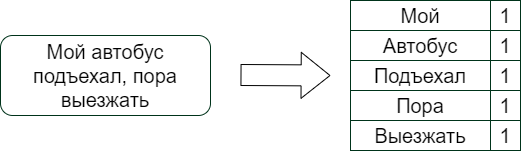



---


**TF-IDF (TF — term frequency, IDF — inverse document frequency)​**

  Рассчитывает отношение встречаемости слова в тексте к его встречаемости среди всего набора документов.

**Различные формулы для расчета** 

Взято с [википедии](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

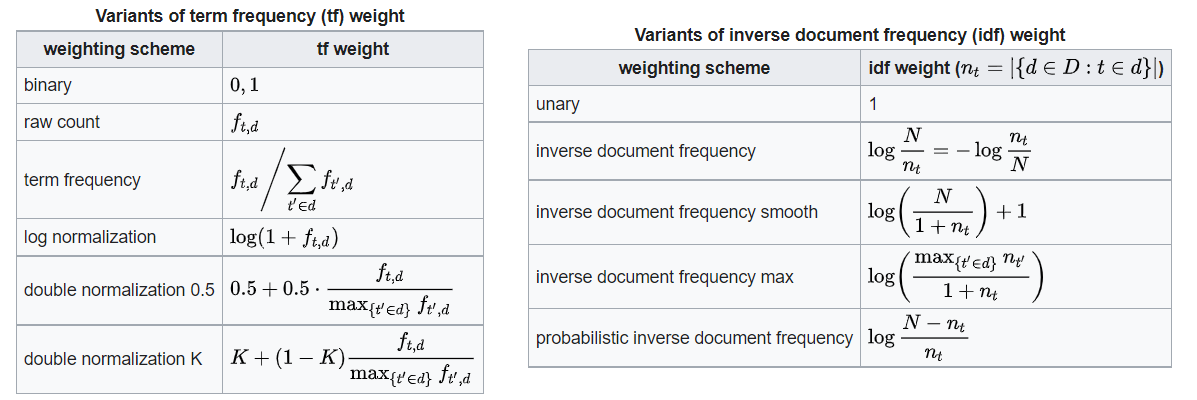

**Недостатки TF-IDF:​**​


*   не решается проблема с порядком слов.
*   не учитывается контекст.​
*   у синонимов могут сильно различаться значения.




---


**Расчет Bag-of-words** и встречаемости слов среди документов (для дальнейшего подсчета TF-IDF)

In [ ]:
data_train = pd.read_csv("preprocessed_data.csv")
BOW = {}
doc_appears = {}

N = data_train.shape[0]
for i in range(N):
    cur = data_train.loc[i,"text"]
    for x in nltk.word_tokenize(cur):
        if BOW.get(x):
            BOW[x]+=1
        else:
            BOW[x]=1
    temp = set(nltk.word_tokenize(cur))
    for word in temp:
        if doc_appears.get(word):
            doc_appears[word]+=1
        else:
            doc_appears[word]=1

print(len(BOW)) # кол-во всех уникальных слов в датасете
BOW = {k: v for k, v in BOW.items() if v > 5}
print(len(BOW)) # из словаря удалены редко встречающиеся токены

70765
16396


Из Bag-of-words можно извлечь довольно серьезную пользу - получить, так называемый "очищенный датасет"(название только что придумал), путем удаления редко встречающихся токенов. Таким образом можно удалить фактически все опечатки.

In [ ]:
data_train = pd.read_csv("preprocessed_data.csv")
for i in range(N):
    cur = data_train.loc[i,"text"]
    x = nltk.word_tokenize(cur)
    x = [word for word in x if word in BOW.keys()]
    data_train.loc[i,"text"] = ' '.join([word for word in x])

data_train.to_csv("cleaned_data.csv", index=False)

**Расчет TF-IDF**

Взял следующую формулу. Не особо выбирал, просто самая красивая)

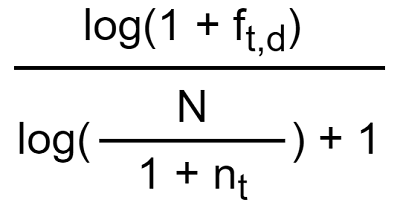

In [ ]:
idf_dict = {}

doc_appears = {k: doc_appears.get(k) for k, v in BOW.items()}
for word in doc_appears.keys():
  idf_dict[word] = math.log( N / (1 + doc_appears.get(word)) ) + 1

In [ ]:
TF_IDF = np.zeros((N,len(doc_appears)))
for i in range(N):
  x = Counter(nltk.word_tokenize(data_train.loc[i,"text"]))
  for j, word in enumerate(doc_appears.keys(), start=0):
    TF_IDF[i,j] = math.log(1+x[word])/idf_dict[word]

In [ ]:
print(BOW)
print(TF_IDF)

{'трамп': 651, 'клинтон': 170, 'выиграть': 87, 'праймериз': 8, 'аризона': 33, 'проиграть': 47, 'кокуса': 6, 'ют': 7, 'получить': 1907, 'голос': 405, 'делегат': 33, 'штат': 626, 'свой': 4307, 'соперник': 70, 'сенатор': 213, 'техас': 50, 'тед': 10, 'круз': 19, 'губернатор': 404, 'огаио': 9, 'джон': 168, 'хиллари': 73, 'время': 4130, 'бернуть': 6, 'сандерс': 28, 'сообщать': 2067, 'оба': 354, 'лидер': 1057, 'поблагодарить': 47, 'проголосовать': 191, 'избирателей': 85, 'крупный': 520, 'победа': 427, 'ожидаться': 225, 'спасибо': 65, 'забыть': 97, 'написать': 500, 'микроблог': 50, 'участник': 633, 'праимериза': 43, 'прошедшее': 83, 'сша': 3094, 'вторник': 289, 'март': 767, 'обойти': 22, 'внимание': 467, 'выступление': 255, 'террористический': 262, 'акт': 162, 'совершенный': 96, 'столица': 517, 'бельгия': 53, 'брюссель': 79, 'обеспечить': 191, 'жесткой': 16, 'передавать': 842, 'частность': 724, 'предположить': 143, 'бельгииский': 11, 'власть': 1994, 'мочь': 2234, 'предотвратить': 78, 'трагедия

**Word2Vec:​**

  Метод обучения эмбедингов на основе контекстного анализа

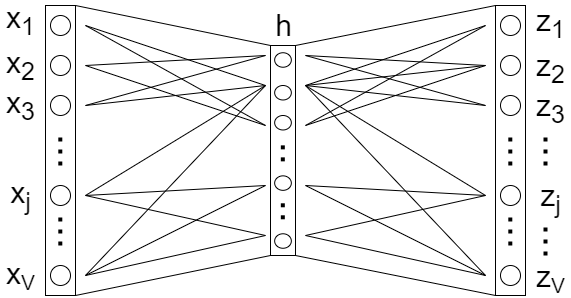

Идея заключается в предсказании следующего слова на основе текущего, с помощью нейронной сети. После чего можно взять веса предпоследнего слоя в качестве эмбедингов.



---

На картинке ниже: *W-input* - таблица эмбедингов;  *h* - эмбединг некоторого слова

Картинка позаимствована [отсюда](https://aegis4048.github.io/demystifying_neural_network_in_skip_gram_language_modeling)

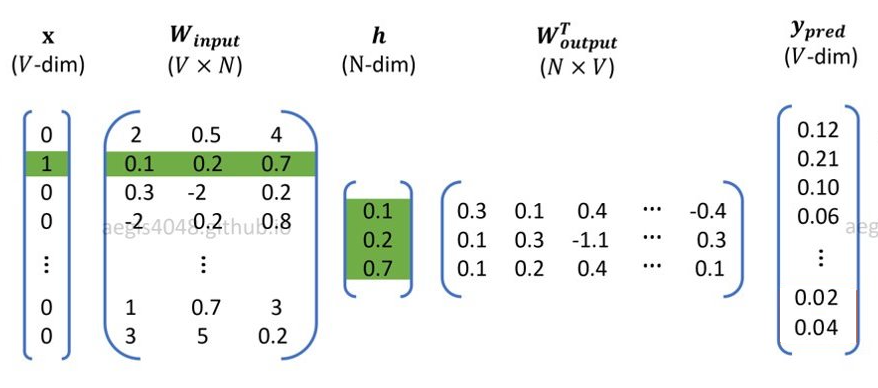

Ниже составляется словарь на основе датасета. (Взята часть датасета, очищенного от редких токенов на этапе подсчета BoW)

In [ ]:
data_train = pd.read_csv("Word2Vec_data.csv")

In [ ]:
vocabulary = set(BOW.keys())

N = data_train.shape[0]
for i in range(N):
    cur = data_train.loc[i,"text"]
    for x in nltk.word_tokenize(cur):
        vocabulary.add(x)


Но его лучше загрузить, так как множество (set) - сущность удобная, но непредсказуемая:)

In [ ]:
vocabulary = []
with open('vocabulary_Word2Vec.txt', 'r') as f:
    for item in f:
        vocabulary.append(item[:-1])


Эмбединги выйдут качественнее, если изменить архитектуру, представленную выше:




*CBOW (Continuous Bag-of-words)* - предсказывает слово на основе его контекста

**Мой автобус** *подъехал*, **пора выезжать.** (жирным выделен контекст)


---


*Skip-gram* - предсказывает контекст по входному слову

*Мой автобус* **подъехал**, *пора выезжать.* (курсивом выделен контекст, который нужно предсказать)

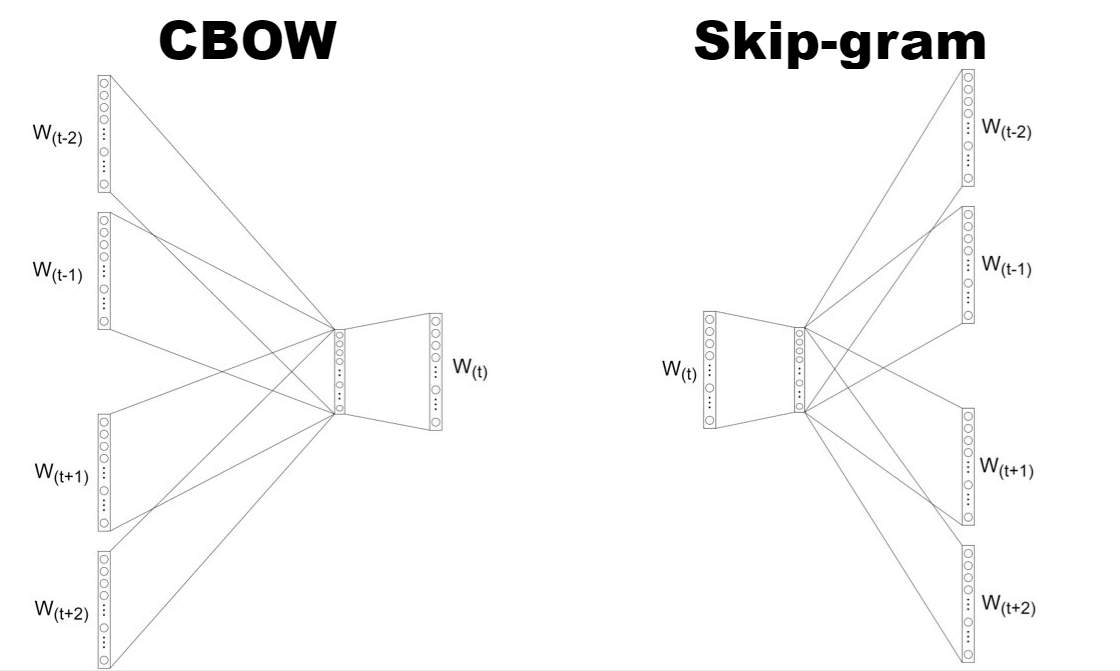

Как ни удивительно, но Skip-gram работает лучше, так что далее рассматривается именно эта идея.

In [ ]:
# индексируем слова

word2idx = {word: idx for (idx, word) in enumerate(vocabulary)}
idx2word = {idx: word for (idx, word) in enumerate(word2idx)}

Ниже составляются пары слов:

**СЛОВО - КОНТЕКСТ**

In [ ]:
window_size = 2
idx_pairs = []

for index, row in data_train.iterrows():
    indices = []
    for word in nltk.word_tokenize(row["text"]):
      if word in vocabulary:
        indices.append(word2idx[word])
    for center_word_pos in range(len(indices)):
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs)

In [ ]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

Ниже рассчитываются эмбединги слов размерности 5.

Матрица эмбедингов храниться в переменной W1.

In [ ]:
embedding_dims = 5 # размерность эмбединга
vocabulary_size = len(vocabulary)

num_epochs = 10
learning_rate = 0.001


W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)

for epo in range(num_epochs):
    print(epo)
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item() 
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

In [ ]:
torch.save(W1, 'W1.pt')